# Tutorial for Cancer-Biomarkers-from-Clinical-Data

# 1. Data loading and preprocessing

## 1.1. Import the necessary modules

In [1]:
# Library imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Add the path to the src folder
import sys
sys.path.append('src')

# Import project functions
from data_preprocessing import load_data, feature_label_split
from random_forest_model import rf_normal_cancers, plot_important_biomarkers
from desc_stats import descriptive_statistics
from stats_tests import ttest

## 1.2. Load the data

In [2]:
categories, dfs = load_data('data/clinical_cancer_data.xlsx')

list(enumerate(categories))

[(0, 'Breast'),
 (1, 'Colorectum'),
 (2, 'Esophagus'),
 (3, 'Liver'),
 (4, 'Lung'),
 (5, 'Normal'),
 (6, 'Ovary'),
 (7, 'Pancreas'),
 (8, 'Stomach')]

In [3]:
biomarkers = feature_label_split(dfs[0])[0].columns
list(enumerate(biomarkers))

[(0, 'AFP '),
 (1, 'Angiopoietin-2 '),
 (2, 'AXL '),
 (3, 'CA-125 '),
 (4, 'CA 15-3 '),
 (5, 'CA19-9 '),
 (6, 'CD44 '),
 (7, 'CEA '),
 (8, 'CYFRA 21-1 '),
 (9, 'DKK1 '),
 (10, 'Endoglin '),
 (11, 'FGF2 '),
 (12, 'Follistatin '),
 (13, 'Galectin-3 '),
 (14, 'G-CSF '),
 (15, 'GDF15 '),
 (16, 'HE4 '),
 (17, 'HGF '),
 (18, 'IL-6 '),
 (19, 'IL-8 '),
 (20, 'Kallikrein-6 '),
 (21, 'Leptin '),
 (22, 'Mesothelin '),
 (23, 'Midkine '),
 (24, 'Myeloperoxidase '),
 (25, 'NSE '),
 (26, 'OPG '),
 (27, 'OPN '),
 (28, 'PAR '),
 (29, 'Prolactin '),
 (30, 'sEGFR '),
 (31, 'sFas '),
 (32, 'SHBG '),
 (33, 'sHER2/sEGFR2/sErbB2 '),
 (34, 'sPECAM-1 '),
 (35, 'TGFa '),
 (36, 'Thrombospondin-2 '),
 (37, 'TIMP-1 '),
 (38, 'TIMP-2 ')]

# 2. Analysis of `Ovary`, `Pancreas` and `Liver` samples, taken together with random subsamples of `Normal` samples

In this section, we will see three cancer types for which the list of biomarkers given by random forest classifier contain biomarkers with uniquely high level in the particular cancer type, along with other biomarkers whose Q3 values are in the top 2 among all cancer types. Essentially, in each of these cancer types, we obtain practically viable biomarkers. 

## 2.1. Analysis of `Normal + Ovary` samples

### 2.1.1. Random forest classification for `Normal + Ovary` samples

In [12]:
important_biomarkers_normal_ovary = rf_normal_cancers(categories = categories, 
                                                      dfs = dfs, 
                                                      cancer1_category_index = 6, 
                                                      iterations = 100,
                                                      threshold = 0.05)

Random forest classification: Normal + Ovary

Average Accuracy over 100 iterations: 0.9614

Biomarkers with Importance >= 0.05:
     Biomarker  Importance
3      CA-125     0.159995
29  Prolactin     0.109398
18       IL-6     0.099734
35       TGFa     0.094122
31       sFas     0.075817


### 2.1.2. Filtering through descriptive statistics of biomarkers in `Normal + Ovary` samples

* Uniquely high levels: `CA-125`
* Higher side filtering: `Prolactin` (1st)

`TGFa` relatively lower.
`sFas` relatively lower.

As an example, we see the descriptive statistics of `CA-125` in all the cancer types as well as `Normal` samples below.

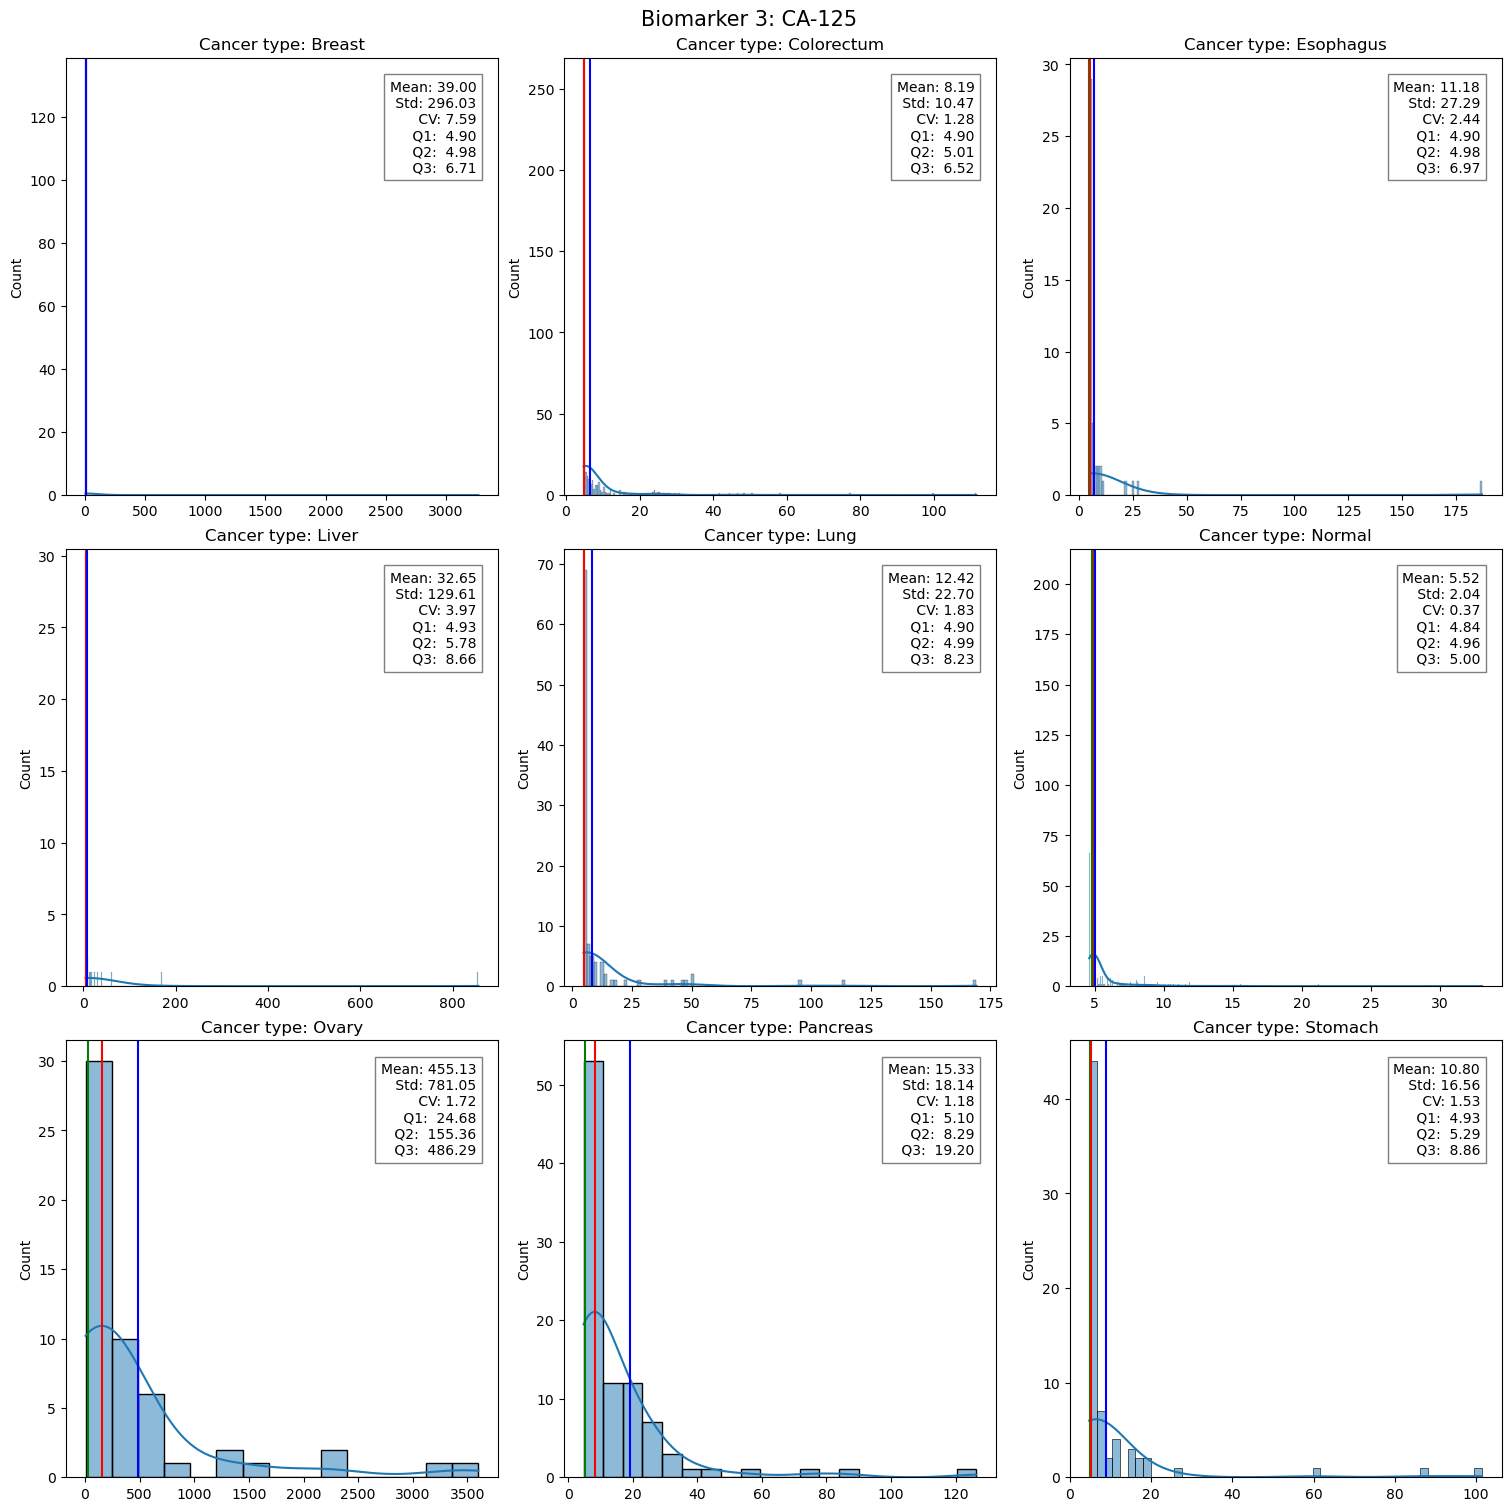

In [4]:
descriptive_statistics(categories = categories, dfs = dfs, biomarker_index = 3)

### 2.1.3. t-test of `CA-125` and `Prolactin` levels in `Ovary` samples versus all the other cancer types

In [ ]:
ca125_index = 3
prolactin_index = 29



## 2.2. Analysis of `Normal + Pancreas` samples

### 2.2.1. Random forest classification for `Normal + Pancreas` samples

In [5]:
important_biomarkers_normal_pancreas = rf_normal_cancers(categories = categories, 
                                                         dfs = dfs, 
                                                         cancer1_category_index = 7, 
                                                         iterations = 100, 
                                                         threshold = 0.05)

Random forest classification: Normal + Pancreas

Average Accuracy over 100 iterations: 0.9389

Biomarkers with Importance >= 0.05:
               Biomarker  Importance
5                CA19-9     0.142069
19                 IL-8     0.094102
18                 IL-6     0.080587
33  sHER2/sEGFR2/sErbB2     0.077110
27                  OPN     0.060258
15                GDF15     0.057668
23              Midkine     0.050770


### 2.2.2. Filtering through descriptive statistics of biomarkers in `Normal + Pancreas` samples

* Uniquely high levels: `CA19-9`
* Higher side filtering: `sHER2/sEGFR2/sErbB2` (1st)

As an example, we see the descriptive statistics of `CA19-9` in all the cancer types as well as `Normal` samples below.

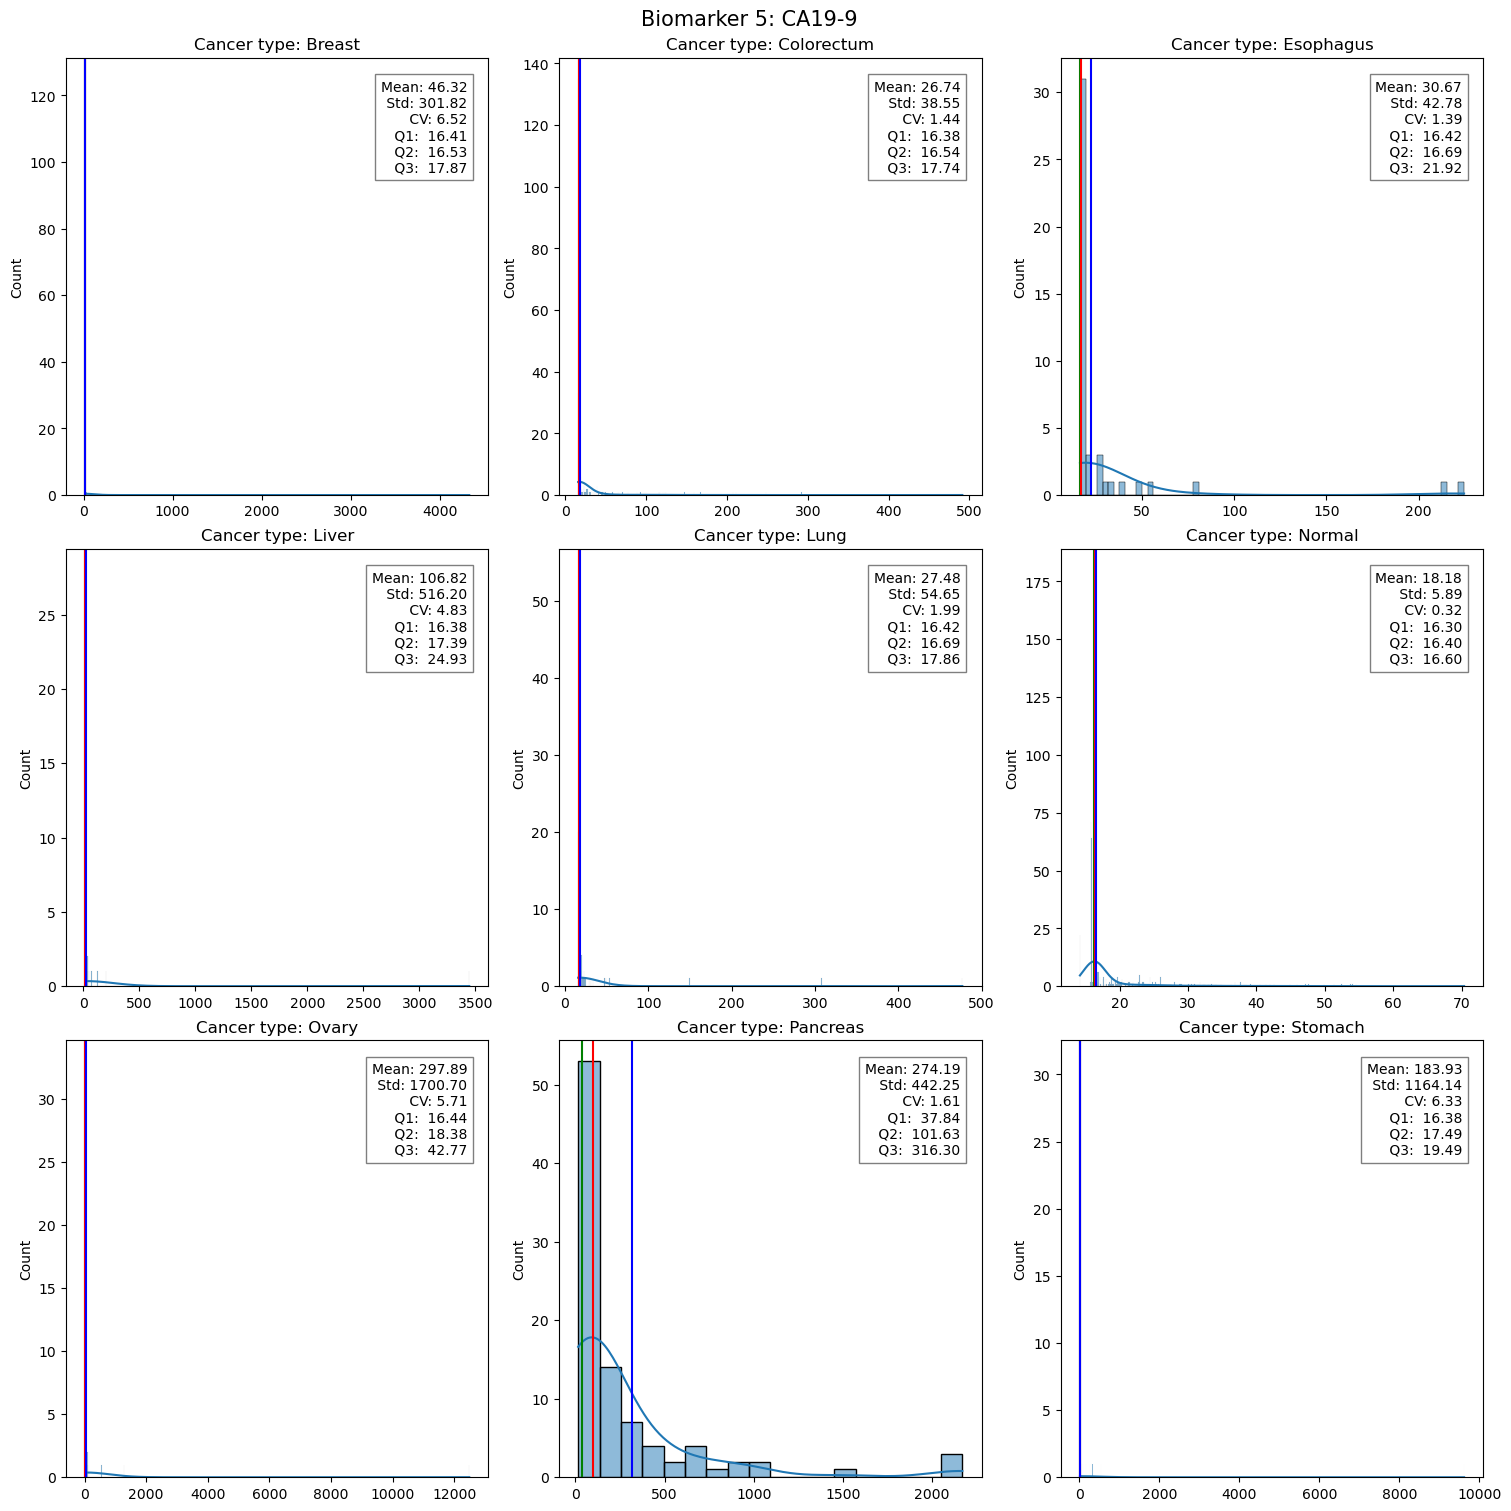

In [6]:
descriptive_statistics(categories = categories, dfs = dfs, biomarker_index = 5)

### 2.2.3. t-test of `CA19-9` and `SHER2/sEGFR2/sErbB2` levels in `Pancreas` samples versus all the other cancer types

## 2.3. Analysis of `Normal + Liver` samples

### 2.3.1. Random forest classification for `Normal + Liver` samples

In [7]:
important_biomarkers_normal_liver = rf_normal_cancers(categories = categories, 
                                                      dfs = dfs,
                                                      cancer1_category_index = 3,
                                                      iterations = 100,
                                                      threshold = 0.05)

Random forest classification: Normal + Liver

Average Accuracy over 100 iterations: 0.9483

Biomarkers with Importance >= 0.05:
           Biomarker  Importance
19             IL-8     0.128577
17              HGF     0.122702
27              OPN     0.117051
15            GDF15     0.085102
24  Myeloperoxidase     0.062697
0               AFP     0.054613


### 2.3.2. Filtering through descriptive statistics of biomarkers in `Normal + Liver` samples

* Uniquely high levels: `AFP`
* Higher side filtering: `OPN` (1st), `Myeloperoxidase`(1st), `HGF` (2nd), `GDF15` (2nd)

`IL-8`, being important in regulating immune response and inflammation, are not specific to any one type of cancer. For example, the same two biomarkers are two of the most important ones in separating `Normal + Breast`, `Normal + Colorectum`, and `Normal + Esophagus` samples, as shown above. And they can be found in higher levels in `Esophagus` and `Stomach` samples.

`HGF` Q3 levels are close in `Liver` and `Esophagus` samples, and higher in `Stomach` samples. Since `HGF` Q3 level in `Liver` is in top 2 among cancer types, we consider it as a potential biomarker for `Liver` cancer.

`OPN` Q3 levels are the highest in `Liver` samples. Hence we consider it as a potential biomarker for `Liver` cancer.

`GDF15` Q3 level in `Liver` is close to that of `Esophagus` and higher in `Pancreas`. Since `GDF15` Q3 level in `Liver` is in top 2 among cancer types, we consider it as a potential biomarker for `Liver` cancer.

`Myeloperoxidase` Q3 level is the highest in `Liver` samples. Hence we consider it as a potential biomarker for `Liver` cancer.

`AFP` levels are the highest in `Liver` samples, and uniquely so. Hence we consider it as a potential biomarker for `Liver` cancer with uniquely high levels.

As an example, we see the descriptive statistics of `AFP` in all the cancer types as well as `Normal` samples below.

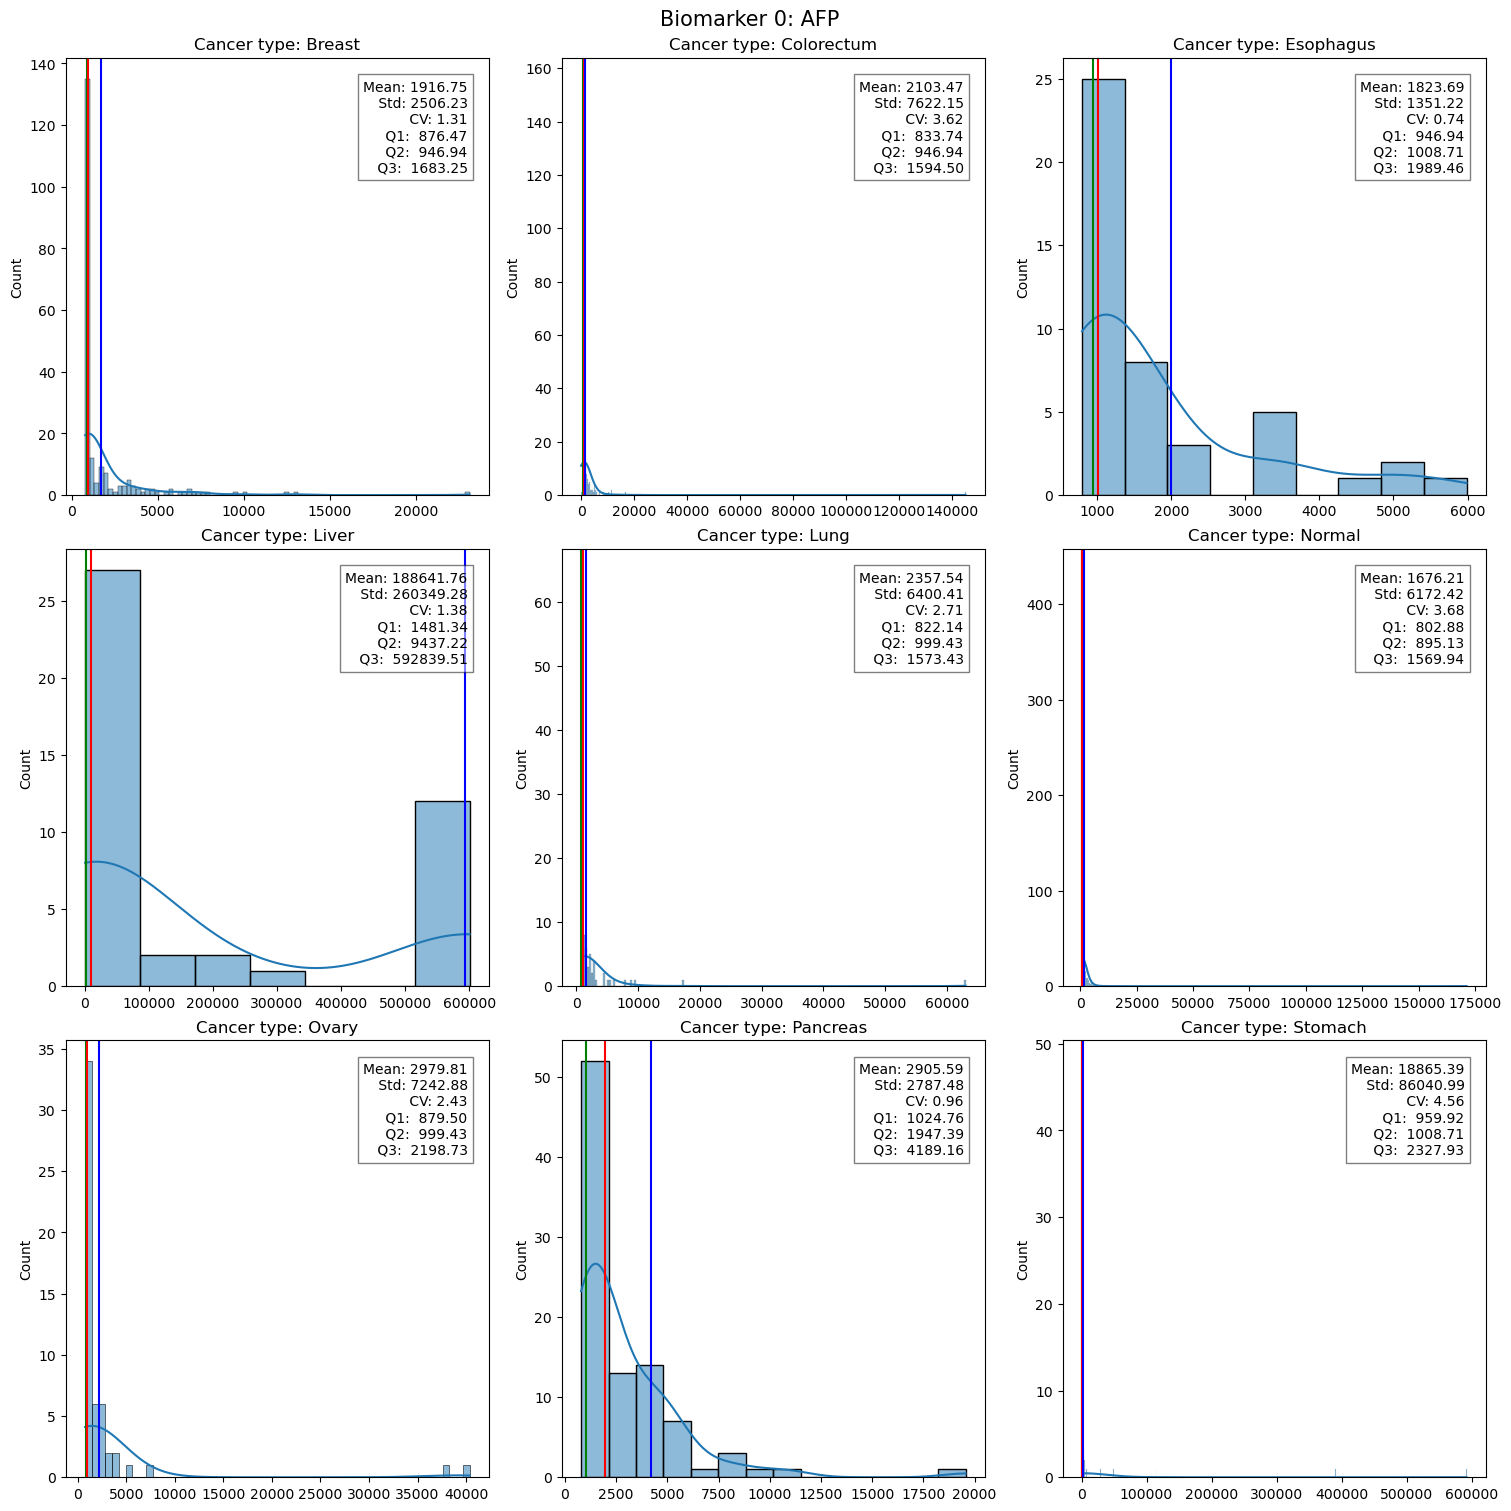

In [8]:
descriptive_statistics(categories = categories, dfs = dfs, biomarker_index = 0)

### 2.3.3 PCA loadings plot of `AFP` and `HGF` levels in `Liver` samples versus all the other cancer types

### 2.3.4 t-test of `AFP`, `OPN`, `Myeloperoxidase`, `HGF` and `GDF15` levels in `Liver` samples versus all the other cancer types

## 2.4. RandomForest accuracy scores for classifying liver, ovarian, and pancreatic cancers from normal ones  

### 2.4.1. Normal + Liver with `AFP`, `OPN` and `Myeloperoxidase`

In [10]:
rf_normal_cancers(categories = categories, 
                  dfs = dfs,
                  cancer1_category_index = 3,
                  selected_biomarkers = np.array([0, 24, 27]),
                  test_size = 0.2,
                  iterations = 100,
                  threshold = 0.05)

Random forest classification: Normal + Liver

Average Accuracy over 100 iterations: 0.9122

Biomarkers with Importance >= 0.05:
          Biomarker  Importance
2              OPN     0.400774
1  Myeloperoxidase     0.302749
0              AFP     0.296477


,Biomarker,Importance
2,OPN,0.400774
1,Myeloperoxidase,0.302749
0,AFP,0.296477


### 2.4.2. Normal + Ovary with `CA-125` and `Prolactin`

In [8]:
# Biomarkers: [{3: CA-125}, {29: Prolactin}]
rf_normal_cancers(categories = categories, 
                  dfs = dfs,
                  cancer1_category_index = 6,
                  selected_biomarkers = np.array([3, 29]),
                  test_size = 0.2,
                  iterations = 100,
                  threshold = 0.05)

Random forest classification: Normal + Ovary

Average Accuracy over 100 iterations: 0.9614

Biomarkers with Importance >= 0.05:
    Biomarker  Importance
0     CA-125     0.546223
1  Prolactin     0.453777


,Biomarker,Importance
0,CA-125,0.546223
1,Prolactin,0.453777


### 2.4.3. Normal + Pancreas with `CA19-9` and `sHER2/sEGFR2/sErbB2`

In [9]:
rf_normal_cancers(categories = categories, 
                  dfs = dfs,
                  cancer1_category_index = 7,
                  selected_biomarkers = np.array([5, 33]),
                  test_size = 0.2,
                  iterations = 100,
                  threshold = 0.05)

Random forest classification: Normal + Pancreas

Average Accuracy over 100 iterations: 0.8932

Biomarkers with Importance >= 0.05:
              Biomarker  Importance
0               CA19-9     0.560814
1  sHER2/sEGFR2/sErbB2     0.439186


,Biomarker,Importance
0,CA19-9,0.560814
1,sHER2/sEGFR2/sErbB2,0.439186


In [11]:
rf_normal_cancers(categories = categories, 
                  dfs = dfs,
                  cancer1_category_index = 3,
                  cancer2_category_index = 6,
                  cancer3_category_index = 7,
                  selected_biomarkers = np.array([0, 24, 27, 3, 29, 5, 33]),
                  test_size = 0.2,
                  iterations = 100,
                  threshold = 0.05)

Random forest classification: Normal + Liver + Ovary + Pancreas

Average Accuracy over 100 iterations: 0.8214

Biomarkers with Importance >= 0.05:
              Biomarker  Importance
3               CA-125     0.188117
6  sHER2/sEGFR2/sErbB2     0.161773
2                  OPN     0.149788
5               CA19-9     0.136768
0                  AFP     0.131891
4            Prolactin     0.119103
1      Myeloperoxidase     0.112559


,Biomarker,Importance
3,CA-125,0.188117
6,sHER2/sEGFR2/sErbB2,0.161773
2,OPN,0.149788
5,CA19-9,0.136768
0,AFP,0.131891
4,Prolactin,0.119103
1,Myeloperoxidase,0.112559


# 3. Analysis of `Breast` and `Colorectum` samples, taken together with random subsamples of `Normal` samples

Now we see two cancer types for which the important biomarkers given by random forest classifier are not suitable in practical scenario for distinguishing between different cancer types from normal samples. None of the biomarkers display uniquely high level for the particular cancer type, and none can be found with Q3 level in top 2 among all the cancer types. 

## 3.1. Analysis of `Normal + Breast` samples

### 3.1.1. Random forest classification for `Normal + Breast` samples

In [9]:
important_biomarkers_normal_breast = rf_normal_cancers(categories = categories, 
                                                       dfs = dfs,
                                                       cancer1_category_index = 0,
                                                       iterations = 100,
                                                       threshold = 0.05)

Random forest classification: Normal + Breast

Average Accuracy over 100 iterations: 0.9630

Biomarkers with Importance >= 0.05:
      Biomarker  Importance
35        TGFa     0.100919
19        IL-8     0.087020
18        IL-6     0.085325
29   Prolactin     0.055615
8   CYFRA 21-1     0.052147


### 3.1.2. Filtering through descriptive statistics of biomarkers in `Normal + Breast` samples

* Uniquely high levels: None
* Higher side filtering: None

Note that, `IL-8` and `IL-6`, being important in regulating immune response and inflammation, are not specific to any one type of cancer. For example, the same two biomarkers are the most important ones in seperating `Normal` and `Colorectum` samples, as shown below. And they can be found in higher levels in some other cancer types, such as `Esophagus`. In fact, `IL-6` and `IL-8` Q3 value is the lowest in `Breast` samples among all the cancer types.

Also, we can have a look at the descriptive statistics of `TGFa` to see that it's Q1, Q2 and Q3 values are very close, and in some cases virtually indistinguishable, in `Breast`, `Colorectum`, `Lung`, `Pancreas` and even `Normal` samples.

`Prolactin` levels are much higher in `Liver`, `Lung` and `Ovary` samples than in `Breast` samples.

`CYFRA 21-1` Q1, Q2 and Q3 values are very close in `Breast` and `Colorectum` samples, and can be found in higher levels in the other cancer types. In fact, the Q3 value of `CYFRA 21-1` is the lowest in `Breast` samples among all the cancer types.

## 3.2. Analysis of `Normal + Colorectum` samples

### 3.2.1. Random forest classification for `Normal + Colorectum` samples

In [10]:
important_biomarkers_normal_colorectum = rf_normal_cancers(categories = categories, 
                                                           dfs = dfs,
                                                           cancer1_category_index = 1,
                                                           iterations = 100,
                                                           threshold = 0.05)

Random forest classification: Normal + Colorectum

Average Accuracy over 100 iterations: 0.9576

Biomarkers with Importance >= 0.05:
     Biomarker  Importance
19       IL-8     0.135958
18       IL-6     0.095141
27        OPN     0.090611
17        HGF     0.061261
15      GDF15     0.058960
31       sFas     0.057872
29  Prolactin     0.054625


### 3.2.2. Filtering through descriptive statistics of biomarkers in `Normal + Colorectum` samples

* Uniquely high levels: None
* Higher side filtering: None

Note that, `IL-8` and `IL-6`, being important in regulating immune response and inflammation, are not specific to any one type of cancer. For example, the same two biomarkers are two of the most important ones in separating `Normal` and `Breast` samples, as shown above. And they can be found in higher levels in some other cancer types, such as `Esophagus`, `Liver` and `Lung` samples.

`OPN` Q3 levels are much higher in `Esophagus`, `Liver`, and `Stomach` samples than in `Colorectum` samples.

`HGF` Q3 levels are higher in `Pancreas` samples, and much higher in `Esophagus`, `Liver`, and `Stomach` samples than in `Colorectum` samples.

`GDF15` Q3 levels are close in `Colorectum` and Ovary samples, and higher in `Esophagus`, `Liver`, `Stomach` and `Pancreas` samples than in `Colorectum` samples.

`sFas` Q3 levels are higher in `Breast`, `Esophagus`, `Liver`, `Lung`, `Pancreas`, `Stomach` and even `Normal` samples than in `Colorectum` samples.

`Prolactin` levels are much higher in `Liver`, `Lung` and `Ovary` samples than in `Colorectum` samples.



# 4. Analysis of `Esophagus`, `Lung` and `Stomach` samples, taken together with random subsamples of `Normal` samples

### 4.1. Random forest classification for `Normal + Esophagus` samples

* Uniquely high levels: None
* Higher side filtering: `IL-6`(1st), `TIMP-1` (1st), `IL-8` (2nd), `OPN` (2nd), `Myeloperoxidase` (2nd)

`OPN` Q2 and Q3 levels are close in `Esophagus` and `Stomach` samples, and higher in `Liver` samples. Since `OPN` Q3 level in `Esophagus` is in top 2 among cancer types, we consider it as a potential biomarker for `Esophagus` cancer.

`HGF` Q3 levels are higher in `Liver` and `Stomach` samples.

`IL-6` and `IL-8`, being important in regulating immune response and inflammation, are not specific to any one type of cancer. For example, the same two biomarkers are two of the most important ones in separating `Normal` and `Breast` samples, and also `Normal` and `Colorectum` samples, as shown above. But `IL-6` and `IL-8` Q3 level in `Esophagus` is in top 2 among cancer types, and we consider it as a potential biomarker for `Esophagus` cancer.

`Myeloperoxidase` Q3 levels are higher only in `Liver` samples. Since `Myeloperoxidase` Q3 level in `Esophagus` is in top 2 among cancer types, we consider it as a potential biomarker for `Esophagus` cancer.

`GDF15` Q3 levels are higher in `Liver` and `Pancreas` samples.

Despite being present in high levels in `Liver`, `Ovary`, `Pancreas` and `Stomach` samples, `TIMP-1` Q3 levels are the highest in `Esophagus` samples. Hence, we consider it as a potential biomarker for `Esophagus` cancer.

In [11]:
important_biomarkers_normal_esophagus = rf_normal_cancers(categories = categories, 
                                                          dfs = dfs,
                                                          cancer1_category_index = 2,
                                                          iterations = 100,
                                                          threshold = 0.05)

Random forest classification: Normal + Esophagus

Average Accuracy over 100 iterations: 0.8617

Biomarkers with Importance >= 0.05:
           Biomarker  Importance
27              OPN     0.098270
17              HGF     0.096577
18             IL-6     0.078884
19             IL-8     0.068289
24  Myeloperoxidase     0.060353
15            GDF15     0.060257
37           TIMP-1     0.051771


### 4.2. Random forest classification for `Normal + Lung` samples

* Uniquely high levels: None
* Higher side filtering: `Prolactin` (2nd), `IL-6` (2nd)

`NSE` Q3 level in `Lung` samples is the lowest among all the cancer types, and even the `Normal` samples.

`Prolactin` Q3 levels in `Lung` samples is in the top 2 among all the cancer types. Hence we consider it a potential biomarker for `Lung` cancer.

`IL-8` relatively lower.

`IL-6` Q3 levels in `Lung` samples are in the top 2 among all the cancer types. Hence, we consider it as a potential biomarker for `Lung` cancer.

`GDF15` relatively lower.

`OPN` relatively lower.

In [12]:
important_biomarkers_normal_lung = rf_normal_cancers(categories = categories, 
                                                     dfs = dfs,
                                                     cancer1_category_index = 4,
                                                     iterations = 100,
                                                     threshold = 0.05)

Random forest classification: Normal + Lung

Average Accuracy over 100 iterations: 0.9769

Biomarkers with Importance >= 0.05:
     Biomarker  Importance
29  Prolactin     0.156559
19       IL-8     0.080851
25        NSE     0.079439
18       IL-6     0.074091
15      GDF15     0.052625
27        OPN     0.051229


### 4.3. Random forest classification for `Normal + Stomach` samples

* Uniquely high levels: None
* Higher side filtering: `IL-8` (1st), `HGF` (1st)

`IL-6` relatively lower.

`IL-8` Q3 level is the highest in `Stomach` samples. Hence, we consider it as a potential biomarker for `Stomach` cancer.

`GDF15` relatively lower.

`HGF` Q3 level is the highest in `Stomach` samples. Hence, we consider it as a potential biomarker for `Stomach` cancer.

`sEGFR` relatively lower.

In [7]:
important_biomarkers_normal_stomach = rf_normal_cancers(categories = categories, 
                                                        dfs = dfs,
                                                        cancer1_category_index = 8,
                                                        iterations = 100,
                                                        threshold = 0.05)

Random forest classification: Normal + Stomach

Average Accuracy over 100 iterations: 0.9304

Biomarkers with Importance >= 0.05:
   Biomarker  Importance
27      OPN     0.152077
18     IL-6     0.088584
19     IL-8     0.075116
15    GDF15     0.066546
17      HGF     0.063138
30    sEGFR     0.056581


# 5. Summary of findings - venn diagrams